In [1]:
import pandas as pd
import numpy as np
#import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
train = pd.read_csv('train.csv', sep = '\t', index_col = 'Unnamed: 0')
test = pd.read_csv('test.csv', sep = '\t', index_col = 'Unnamed: 0')

In [3]:
y = train['0']
train = train.drop('0', axis = 1)

In [185]:
zero_features = [column for column in train.columns if len(train[column].value_counts()) == 1]

train.drop(zero_features, inplace = True, axis = 1)
test.drop(zero_features, inplace = True, axis = 1)

In [101]:
cat_features_may_be = [column for column in train.columns if ((len(train[column].value_counts())<20)&(len(train[column].value_counts())>2))]

In [147]:
bin_features = [column for column in train.columns if len(train[column].value_counts()) == 2]
cat_features = ['341','124','117']
real_colums = list((set(train.columns).difference(set(bin_features))).difference(set(cat_features)))

In [186]:
train[bin_features] = train[bin_features].astype(str)

In [103]:
plt.rcParams['figure.figsize'] = 20, 20

In [92]:
#train[real_colums].corr() > 0.8
cor_matrix = train[real_colums].corr()

for row in cor_matrix.index:
    for col in cor_matrix.index:
        if cor_matrix.loc[row, col] > 0.95:
            print(cor_matrix.loc[row, col], row, col)

1.0 81 81
1.0 89 89
1.0 335 335
0.956128749249 335 325
0.983135597936 335 324
0.964711524277 335 323
0.99101478637 335 333
1.0 210 210
1.0 115 115
0.989875370858 115 122
1.0 98 98
1.0 107 107
1.0 13 13
1.0 77 77
1.0 74 74
1.0 201 201
1.0 118 118
1.0 85 85
1.0 87 87
1.0 78 78
1.0 80 80
1.0 106 106
1.0 320 320
1.0 204 204
1.0 322 322
1.0 117 117
1.0 103 103
1.0 7 7
1.0 108 108
1.0 314 314
1.0 67 67
1.0 198 198
0.956128749249 325 335
1.0 325 325
0.960180447351 325 326
0.95712444324 325 323
0.985693290054 325 319
0.954373550418 325 333
1.0 102 102
1.0 75 75
1.0 119 119
1.0 114 114
1.0 205 205
1.0 126 126
0.983135597936 324 335
1.0 324 324
0.951960389388 324 334
0.99638867647 324 333
1.0 213 213
1.0 317 317
1.0 83 83
1.0 76 76
1.0 196 196
1.0 195 195
1.0 94 94
1.0 214 214
1.0 84 84
1.0 313 313
1.0 123 123
0.960180447351 326 325
1.0 326 326
0.957270526705 326 319
1.0 109 109
1.0 341 341
1.0 93 93
0.964711524277 323 335
0.95712444324 323 325
1.0 323 323
0.956215512498 323 319
0.961369526139 3

In [139]:
from sklearn.decomposition import PCA

pca = PCA(n_components=80)
pca.fit(train[real_colums])
train_real = pca.transform(train[real_colums])

In [148]:
train[cat_features] = train[cat_features].astype(str)

In [149]:
train_one_hot = pd.get_dummies(train[cat_features])

In [187]:
#X = pd.concat([pd.DataFrame(train_real), train_one_hot, train[bin_features]], axis=1)
#X = pd.concat([pd.DataFrame(train_real), train[cat_features], train[bin_features]], axis=1)
X = pd.concat([train[real_colums], train[cat_features], train[bin_features]], axis=1)

In [151]:
delet = []
for i in train.columns:
    if len(train[i].value_counts())==2:
        if min(train[i].value_counts()[0],train[i].value_counts()[1])/max(train[i].value_counts()[0],train[i].value_counts()[1])<=0.005:
            delet.append(i)

In [30]:
y = train['0']
X = train.drop('0', axis = 1)

In [31]:
X_test = test.drop('0', axis = 1)

In [14]:
(X_test.shape[0])/(X.shape[0]+X_test.shape[0])

0.12017538798823055

In [8]:
sum(np.array(train.corr()==1))

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [6]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [34]:
skf = StratifiedKFold(shuffle = True, random_state = 42)

In [35]:
lg = LogisticRegression(class_weight = 'balanced')
parameters = {"C": [0.0001, 0.005, 0.001, 0.01, 1]}
r_grid_search = RandomizedSearchCV(lg, parameters, scoring ='roc_auc', n_iter=5, cv=skf, random_state=1)
r_grid_search = r_grid_search.fit(X, y)
print(r_grid_search.best_score_)

0.723760454245


In [22]:
r_grid_search.best_params_

{'C': 1}

In [36]:
y_pred = r_grid_search.predict_proba(X_test)

In [32]:
X_test.shape

(4166, 345)

In [33]:
y_pred.shape

(3660, 2)

In [38]:
len(y_pred[:,0])

4166

In [13]:
def write_answer(file_name,id_,prediction):
    with open(file_name, "w") as f_out:
        f_out.write('_ID_,_VAL_'+"\n")
        for i in range(len(id_)):
            f_out.write(str(id_[i])+str(',')+str(prediction[i])+"\n")

In [40]:
write_answer('1.txt',X_test.index,y_pred[:,1])

In [21]:
%%time
parameters = {'max_features': [0.5, 0.7, 0.9, 1.], 'max_samples': [0.5, 0.7, 0.9, 1.], "base_estimator__C": [0.005, 0.001, 0.01,0.1]}
bg = BaggingClassifier(lg, random_state=42, n_estimators=30)
r_grid_search = RandomizedSearchCV(bg, parameters, scoring ='roc_auc', n_iter=10, cv=skf, random_state=1)
r_grid_search = r_grid_search.fit(X, y)
print(r_grid_search.best_score_)

0.726811415502
CPU times: user 8min 45s, sys: 33.8 s, total: 9min 19s
Wall time: 8min 55s


In [22]:
r_grid_search.best_params_

{'base_estimator__C': 0.1, 'max_features': 1.0, 'max_samples': 0.9}

In [23]:
y_pred = r_grid_search.predict(X_test)

## Random Forest

In [15]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

In [188]:
%%time
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

# Обучаем на тренировочном датасете
results = cross_val_score(rfc, X, y, cv=skf, scoring = 'roc_auc')

# Оцениваем точность на тестовом датасете
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 66.49%
CPU times: user 18.3 s, sys: 819 ms, total: 19.2 s
Wall time: 24.1 s


In [168]:
%%time
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 83.01% with 100 trees
CPU times: user 5min 9s, sys: 5.89 s, total: 5min 15s
Wall time: 3min 42s


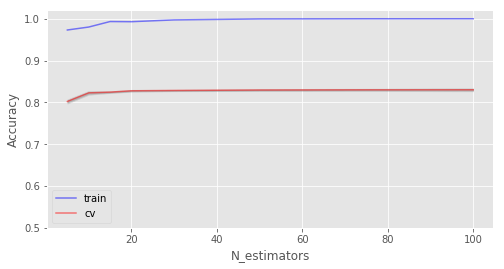

In [169]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.5,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

In [170]:
%%time
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(n_estimators=100,random_state=42, n_jobs=-1, oob_score=True)

# Обучаем на тренировочном датасете
results = cross_val_score(rfc, X, y, cv=skf)

# Оцениваем точность на тестовом датасете
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 83.01%
CPU times: user 1min 30s, sys: 489 ms, total: 1min 31s
Wall time: 53.5 s


In [171]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [41]:
y_pred = rfc.predict(X_test)

In [46]:
write_answer('1.txt',X_test.index,y_pred)

In [179]:
%%time
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        #temp_train_acc.append(roc_auc_score(rfc.predict(X_train), y_train))
        temp_test_acc.append(roc_auc_score(rfc.predict(X_test), y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

AttributeError: 'list' object has no attribute 'mean'

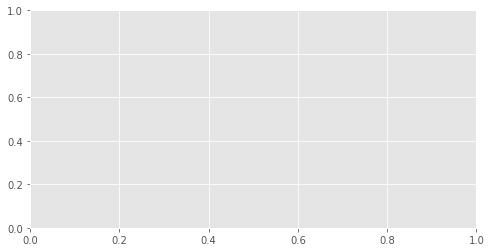

In [173]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.5,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

In [174]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(roc_auc_score(rfc.predict(X_train), y_train))
        temp_test_acc.append(roc_auc_score(rfc.predict(X_test), y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 75.11% with 20 min_samples_leaf


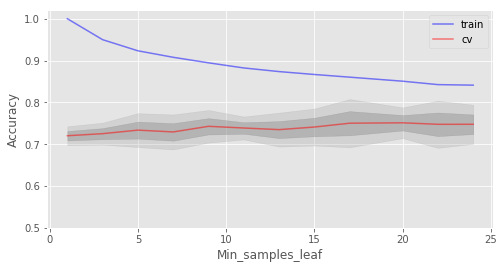

In [175]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.5,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

Best accuracy on CV is 72.62% with 12 max_features
CPU times: user 8min 31s, sys: 5.94 s, total: 8min 37s
Wall time: 5min 9s


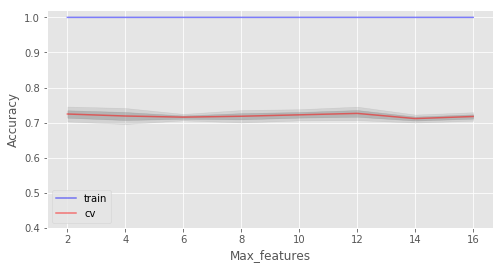

In [176]:
%%time
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(roc_auc_score(rfc.predict(X_train), y_train))
        temp_test_acc.append(roc_auc_score(rfc.predict(X_test), y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.4,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

In [53]:
%%time
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {'max_features': [4, 6, 9], 'min_samples_leaf': [5, 10, 15], 'max_depth': [10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1, scoring = 'roc_auc')
gcv.fit(X, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.0min finished


CPU times: user 28.5 s, sys: 339 ms, total: 28.8 s
Wall time: 4min 8s


In [54]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=20, max_features=9, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=5, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
             oob_score=False, random_state=42, verbose=0, warm_start=False),
 0.72439516636413659)

In [55]:
y_pred_rf = gcv.predict_proba(X_test)

In [56]:
y_pred_rf.shape

(4166, 2)

In [64]:
write_answer('3.txt',X_test.index,y_pred_rf[:,1])

In [57]:
from sklearn.ensemble import ExtraTreesClassifier

parameters = {'max_features': [3, 4, 5, 6, 7], 'min_samples_leaf': [1, 3, 5], 'max_depth': [5,10,15,20]}
etc = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
etcv = GridSearchCV(etc, parameters, n_jobs=-1, cv=skf, verbose=1, scoring='roc_auc')
etcv.fit(X, y)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [3, 4, 5, 6, 7], 'min_samples_leaf': [1, 3, 5], 'max_depth': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [58]:
etcv.best_estimator_, etcv.best_score_

(ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
 0.72782423855339706)

In [59]:
y_pred_et = etcv.predict_proba(X_test)

In [61]:
y_pred_rf[0][0]

0.78666211574384748

In [63]:
from scipy.stats import rankdata
[(rankdata(rf_p[1]) + rankdata(et_p[1]))[0] for rf_p, et_p in zip(y_pred_rf, y_pred_et)]

[2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0

# Stecking

In [10]:
from vecstack import stacking

In [11]:
# Get your data

# Initialize 1st level models

# Get your stacking features in a single line
S_train, S_test = stacking(models, X_train, y_train, X_test, regression = True, verbose = 2)

# Use 2nd level model with stacking features

NameError: name 'models' is not defined

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking


# Make train/test split
# As usual in machine learning task we have X_train, y_train, and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.12, random_state = 0)

# Caution! All models and parameter values are just 
# demonstrational and shouldn't be considered as recommended.
# Initialize 1st level models.
models = [
    LogisticRegression(),
        
    RandomForestClassifier(random_state = 0, n_jobs = -1, 
        n_estimators = 100, max_depth = 10, min_samples_leaf = 5, max_features = 9),
        
    XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.1, 
        n_estimators = 100, max_depth = 3)]
    
# Compute stacking features
S_train, S_test = stacking(models, X_train, y_train, X_test, 
    regression = False, metric = roc_auc_score, n_folds = 4, 
    stratified = True, shuffle = True, random_state = 0, verbose = 2)

# Initialize 2nd level model
model = XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.1, 
    n_estimators = 100, max_depth = 3)
    
# Fit 2nd level model
model = model.fit(S_train, y_train)

# Predict
y_pred = model.predict_proba(S_test)

# Final prediction score
print('Final prediction score: [%.8f]' % roc_auc_score(y_test, y_pred[:,1]))

task:       [classification]
n_classes:  [2]
metric:     [roc_auc_score]
mode:       [oof_pred_bag]
n_models:   [3]

model 0:    [LogisticRegression]
    fold 0: [0.55136545]
    fold 1: [0.55220650]
    fold 2: [0.55091053]
    fold 3: [0.55349440]
    ----
    MEAN:   [0.55199422] + [0.00098302]
    FULL:   [0.55199430]

model 1:    [RandomForestClassifier]
    fold 0: [0.51002809]
    fold 1: [0.50603618]
    fold 2: [0.50862532]
    fold 3: [0.51045800]
    ----
    MEAN:   [0.50878690] + [0.00172668]
    FULL:   [0.50878655]

model 2:    [XGBClassifier]
    fold 0: [0.53325516]
    fold 1: [0.52956711]
    fold 2: [0.52922717]
    fold 3: [0.53605700]
    ----
    MEAN:   [0.53202661] + [0.00281245]
    FULL:   [0.53202631]

Final prediction score: [0.54804298]


In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

X_train = X
y_train = y
test = pd.read_csv('test.csv', sep = '\t', index_col = 'Unnamed: 0')
X_test = test.drop('0', axis = 1)


models = [
    LogisticRegression(),
        
    RandomForestClassifier(random_state = 0, n_jobs = -1, 
        n_estimators = 100, max_depth = 10, min_samples_leaf = 5, max_features = 9),
        
    XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.1, 
        n_estimators = 100, max_depth = 3)]
    
# Compute stacking features
S_train, S_test = stacking(models, X_train, y_train, X_test, 
    regression = False, metric = roc_auc_score, n_folds = 4, 
    stratified = True, shuffle = True, random_state = 0, verbose = 2)

# Initialize 2nd level model
model = XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.1, 
    n_estimators = 100, max_depth = 3)
    
# Fit 2nd level model
model = model.fit(S_train, y_train)

# Predict
y_pred = model.predict_proba(S_test)

task:       [classification]
n_classes:  [2]
metric:     [roc_auc_score]
mode:       [oof_pred_bag]
n_models:   [3]

model 0:    [LogisticRegression]
    fold 0: [0.54643759]
    fold 1: [0.55433870]
    fold 2: [0.54978447]
    fold 3: [0.54918144]
    ----
    MEAN:   [0.54993555] + [0.00283791]
    FULL:   [0.54993549]

model 1:    [RandomForestClassifier]
    fold 0: [0.51021475]
    fold 1: [0.50891890]
    fold 2: [0.51124111]
    fold 3: [0.50898582]
    ----
    MEAN:   [0.50984014] + [0.00095937]
    FULL:   [0.50984037]

model 2:    [XGBClassifier]
    fold 0: [0.53140076]
    fold 1: [0.53244602]
    fold 2: [0.53624315]
    fold 3: [0.53733094]
    ----
    MEAN:   [0.53435522] + [0.00248963]
    FULL:   [0.53435473]



In [52]:
write_answer('2.txt',X_test.index,y_pred)